# TIME SERIES ANALYSIS
## (Stock Market Case S&P 500)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os


# COLLECITON OF STOCK DATA 

In [3]:
glob.glob(r'C:\Users\Aryan\OneDrive\Desktop\Udemy Courses\Data Analytics Projects\individual_stocks_5yr/*csv')

['C:\\Users\\Aryan\\OneDrive\\Desktop\\Udemy Courses\\Data Analytics Projects\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\Aryan\\OneDrive\\Desktop\\Udemy Courses\\Data Analytics Projects\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\Aryan\\OneDrive\\Desktop\\Udemy Courses\\Data Analytics Projects\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\Aryan\\OneDrive\\Desktop\\Udemy Courses\\Data Analytics Projects\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\Aryan\\OneDrive\\Desktop\\Udemy Courses\\Data Analytics Projects\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\Aryan\\OneDrive\\Desktop\\Udemy Courses\\Data Analytics Projects\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\Aryan\\OneDrive\\Desktop\\Udemy Courses\\Data Analytics Projects\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\Aryan\\OneDrive\\Desktop\\Udemy Courses\\Data Analytics Projects\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\Aryan\\OneDrive\\Desktop\\Udemy Courses\\Data An

In [5]:
len(glob.glob(r'C:\Users\Aryan\OneDrive\Desktop\Udemy Courses\Data Analytics Projects\individual_stocks_5yr/*csv'))

505

In [7]:
company_list = [
    r'C:\\Users\\Aryan\\OneDrive\\Desktop\\Udemy Courses\\Data Analytics Projects\\individual_stocks_5yr\\AAPL_data.csv',
    r'C:\\Users\\Aryan\\OneDrive\\Desktop\\Udemy Courses\\Data Analytics Projects\\individual_stocks_5yr\\AMZN_data.csv',
    r'C:\\Users\\Aryan\\OneDrive\\Desktop\\Udemy Courses\\Data Analytics Projects\\individual_stocks_5yr\\GOOG_data.csv',
    r'C:\\Users\\Aryan\\OneDrive\\Desktop\\Udemy Courses\\Data Analytics Projects\\individual_stocks_5yr\\MSFT_data.csv'

]

In [9]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
all_data = pd.DataFrame()

for file in company_list:
    current_data = pd.read_csv(file)

    all_data = pd.concat([all_data, current_data], ignore_index = True)

In [13]:
current_data.shape

(1259, 7)

In [15]:
all_data.shape

(4752, 7)

In [17]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


In [19]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

# ANALYSIS OF STOCK PRICE CHANGE OVER TIME 

In [22]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [24]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [26]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [28]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [30]:
tech_list = all_data['Name'].unique()

In [32]:
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

# ANALYSIS OF STOCK PRICE CHANGE OVER TIME 

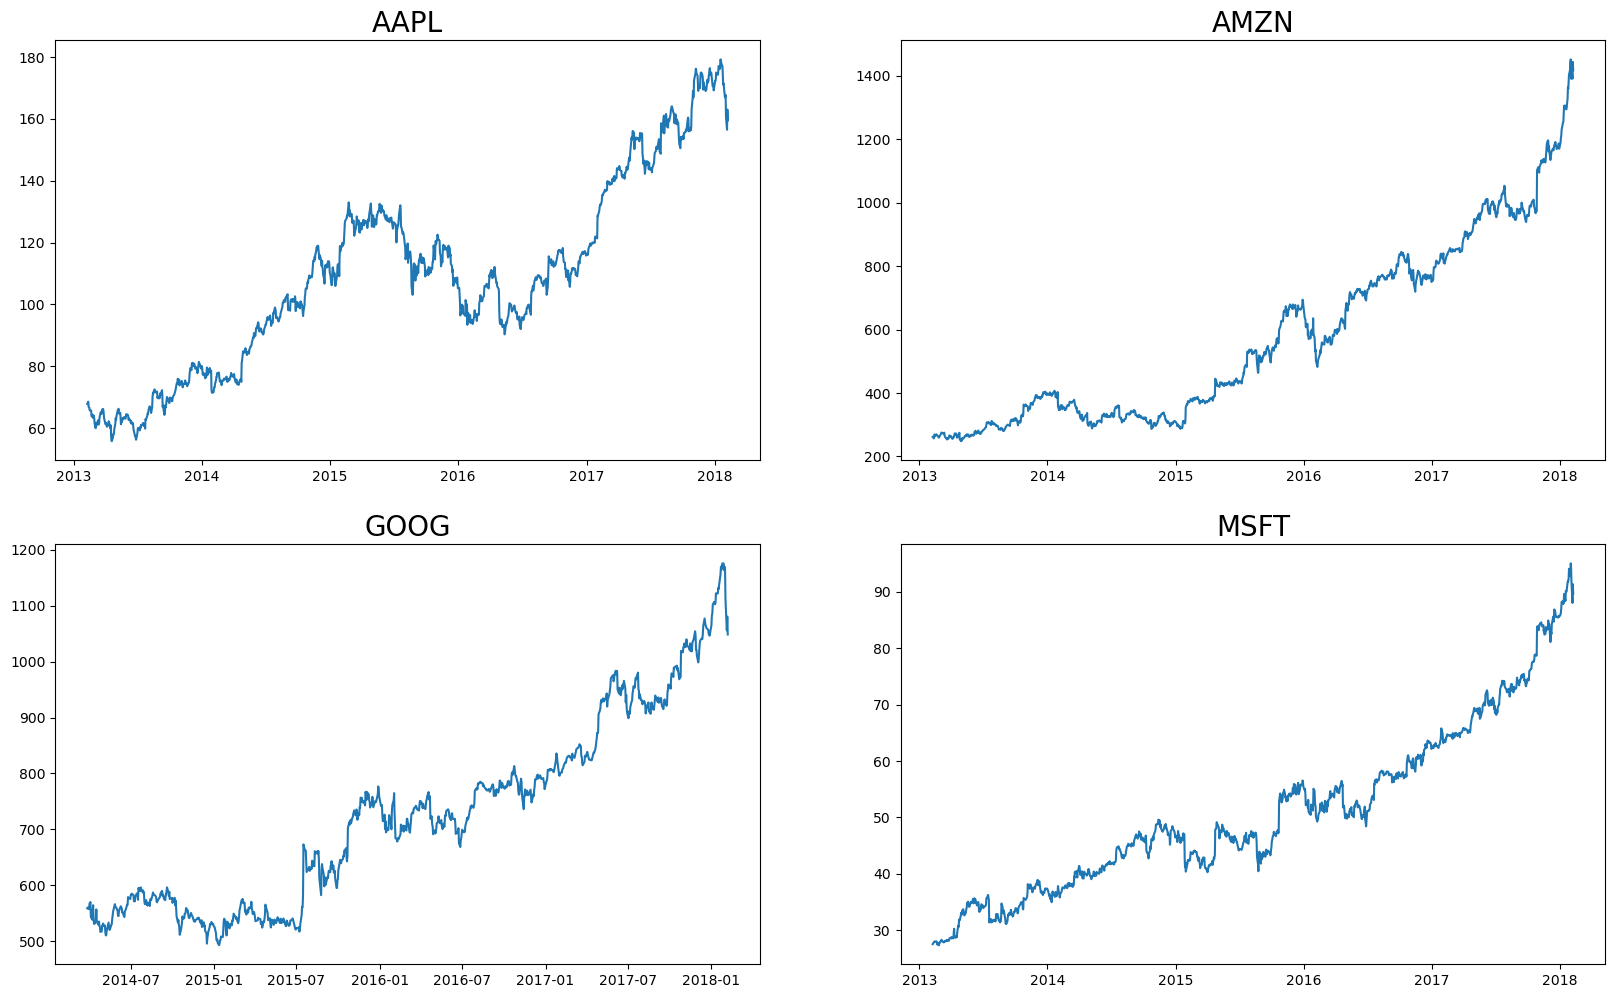

In [52]:
plt.figure(figsize = (20,12))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 = all_data['Name'] == company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company, fontsize = 20)

In [ ]:
# ANALYSIS OF MOVING AVERAGES OF VARIOUS STOCKS

In [55]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [57]:
all_data['close']

0       67.8542
1       68.5614
2       66.8428
3       66.7156
4       66.6556
         ...   
4747    94.2600
4748    91.7800
4749    88.0000
4750    91.3300
4751    89.6100
Name: close, Length: 4752, dtype: float64

In [59]:
all_data['close'].rolling(window = 10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [61]:
new_data = all_data.copy()

In [63]:
new_data

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
4747,2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT
4748,2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT
4749,2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT
4750,2018-02-06,86.8900,91.4750,85.2500,91.3300,67998564,MSFT


In [65]:
ma_day = [10, 20, 50]

for ma in ma_day:
    new_data['close'+str(ma)] = new_data['close'].rolling(ma).mean()

In [67]:
new_data

,date,open,high,low,close,volume,Name,close10,close20,close50
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4747,2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.8900,91.4750,85.2500,91.3300,67998564,MSFT,92.525,91.0535,87.4328


In [69]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close10,close20,close50
4745,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
4746,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [71]:
new_data.set_index('date', inplace = True)

In [73]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close10', 'close20',
       'close50'],
      dtype='object')

# ANALYSIS OF MOVING AVERAGES OF VARIOUS STOCKS

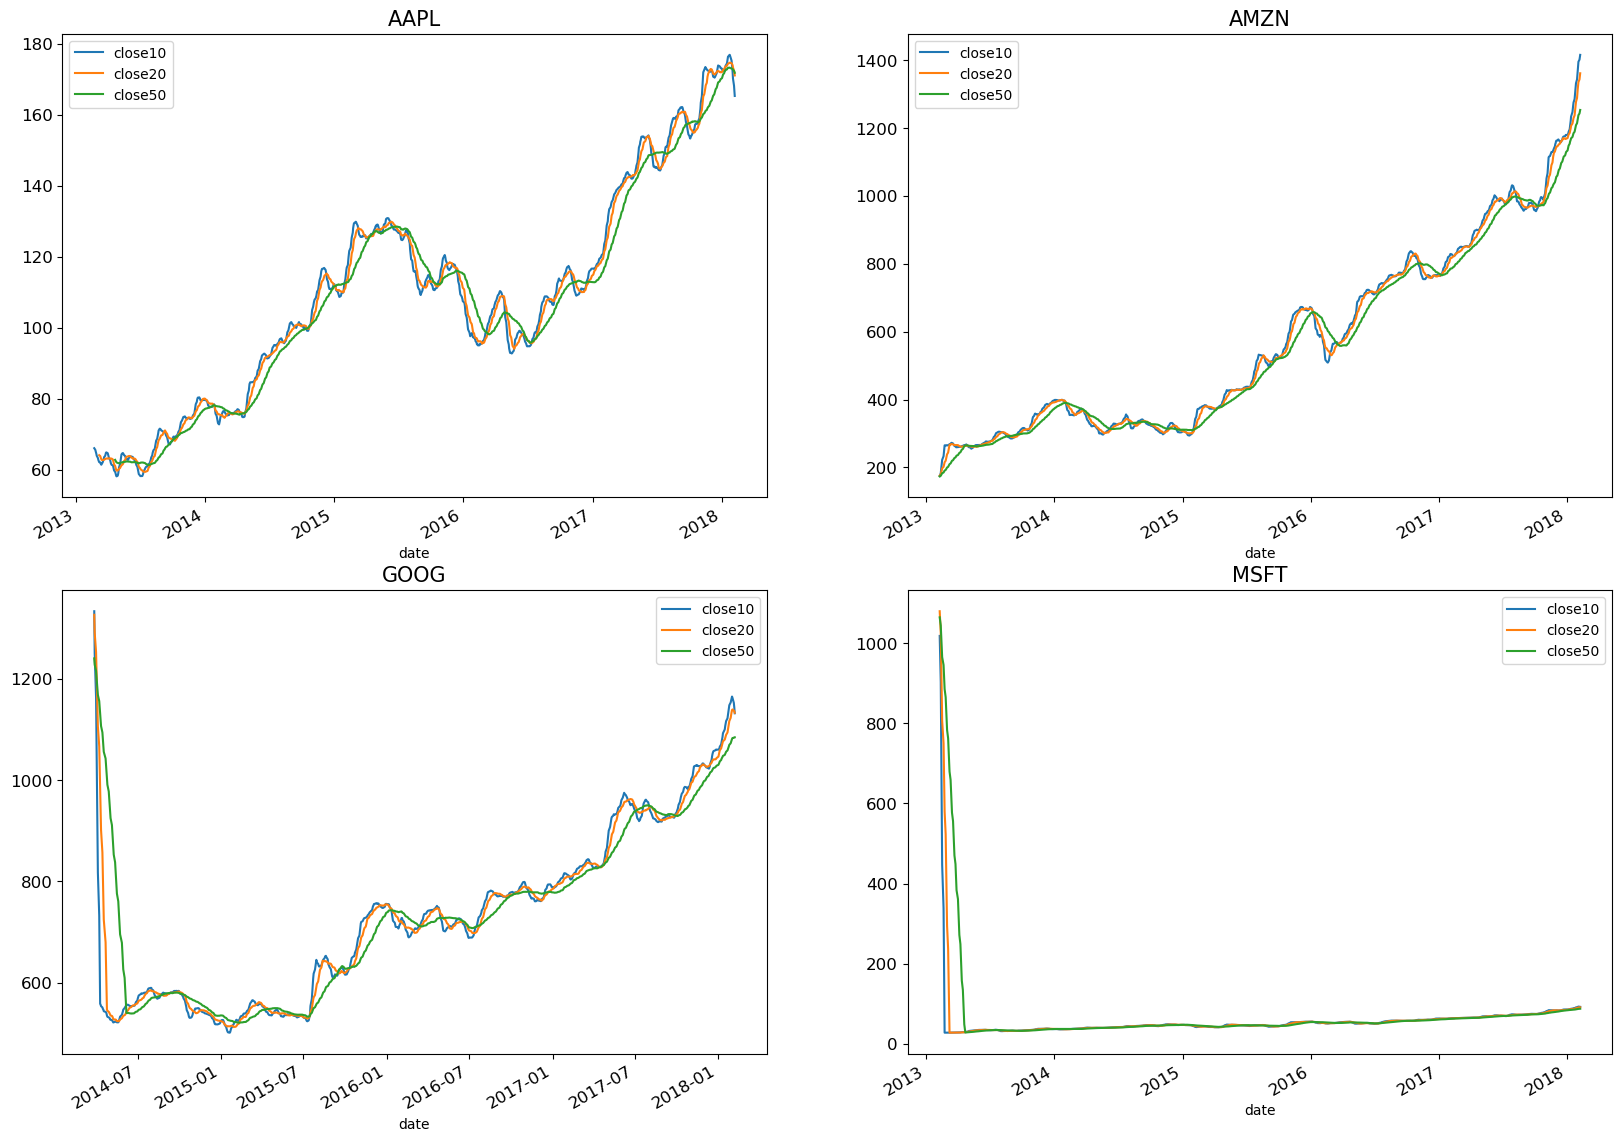

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    df[['close10', 'close20','close50']].plot(ax = plt.gca(), fontsize = 12)
    plt.title(company, fontsize = 15)

# ANALYSIS IN CLOSING PRICE CHANGE FOR APPLE STOCK

In [104]:
company_list

['C:\\\\Users\\\\Aryan\\\\OneDrive\\\\Desktop\\\\Udemy Courses\\\\Data Analytics Projects\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\Aryan\\\\OneDrive\\\\Desktop\\\\Udemy Courses\\\\Data Analytics Projects\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\Aryan\\\\OneDrive\\\\Desktop\\\\Udemy Courses\\\\Data Analytics Projects\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\Aryan\\\\OneDrive\\\\Desktop\\\\Udemy Courses\\\\Data Analytics Projects\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [108]:
apple = pd.read_csv(r'C:\\\\Users\\\\Aryan\\\\OneDrive\\\\Desktop\\\\Udemy Courses\\\\Data Analytics Projects\\\\individual_stocks_5yr\\\\AAPL_data.csv')

In [112]:
apple.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


apple['close']

# ANALYSIS IN CLOSING PRICE CHANGE FOR APPLE STOCK

In [120]:
apple['Daily return (in %)'] = apple['close'].pct_change() * 100

In [124]:
apple.head(5)

,date,open,high,low,close,volume,Name,Daily return (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [126]:
import plotly.express as px

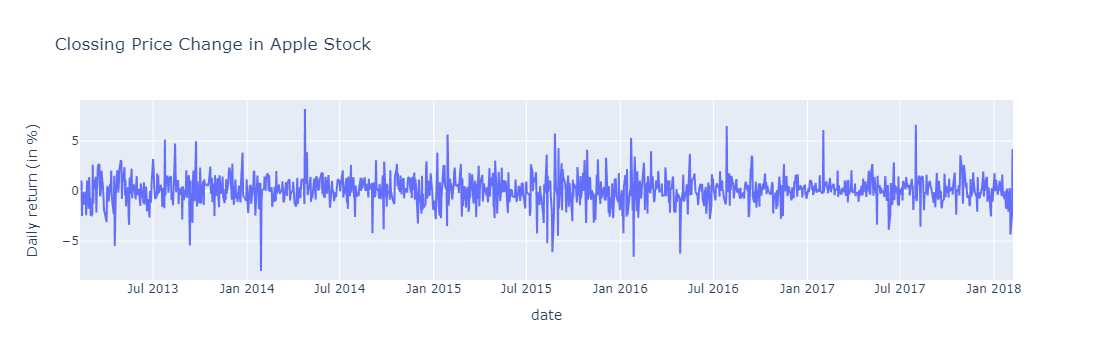

In [153]:
px.line(apple, x = 'date', y = 'Daily return (in %)', title = 'Clossing Price Change in Apple Stock', height = 15)

#### Besides Apple, you can create it for other Stocks as well by repeating the same process and changing the path of the Stock and saving it to a new object

# RESAMPLING ANALYSIS

In [155]:
apple.dtypes

date                    object
open                   float64
high                   float64
low                    float64
close                  float64
volume                   int64
Name                    object
Daily return (in %)    float64
dtype: object

In [157]:
apple['date'] = pd.to_datetime(apple['date'])

In [159]:
apple.dtypes

date                   datetime64[ns]
open                          float64
high                          float64
low                           float64
close                         float64
volume                          int64
Name                           object
Daily return (in %)           float64
dtype: object

In [161]:
apple.head(5)

,date,open,high,low,close,volume,Name,Daily return (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [163]:
apple.set_index('date', inplace = True)

In [165]:
apple.head(5)

,open,high,low,close,volume,Name,Daily return (in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [167]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

Text(0.5, 1.0, 'MONTHLY RESAMPLE')

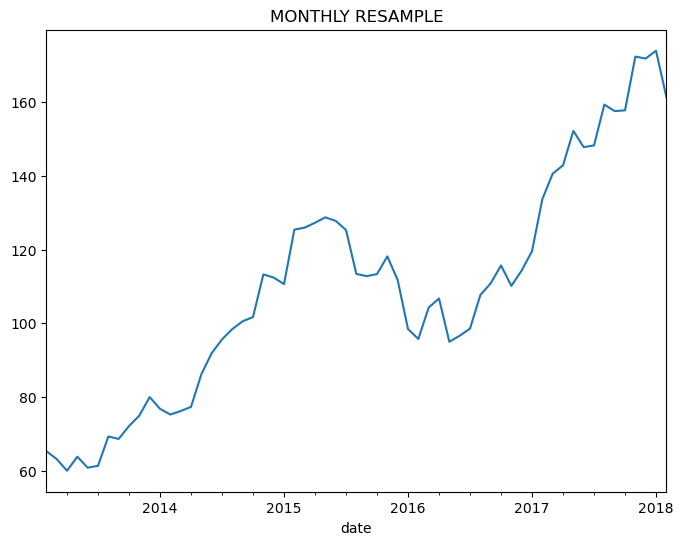

In [179]:
plt.figure(figsize = (8,6))
apple['close'].resample('M').mean().plot()
plt.title('MONTHLY RESAMPLE')

In [181]:
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

Text(0.5, 1.0, 'YEARLY RESAMPLE')

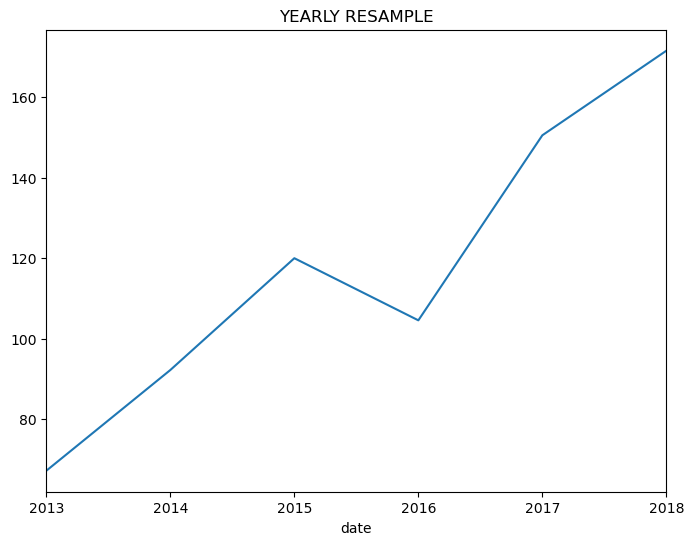

In [183]:
plt.figure(figsize = (8,6))
apple['close'].resample('Y').mean().plot()
plt.title('YEARLY RESAMPLE')

In [185]:
apple['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

# RESAMPLING ANALYSIS

Text(0.5, 1.0, 'QUATERLY RESAMPLE')

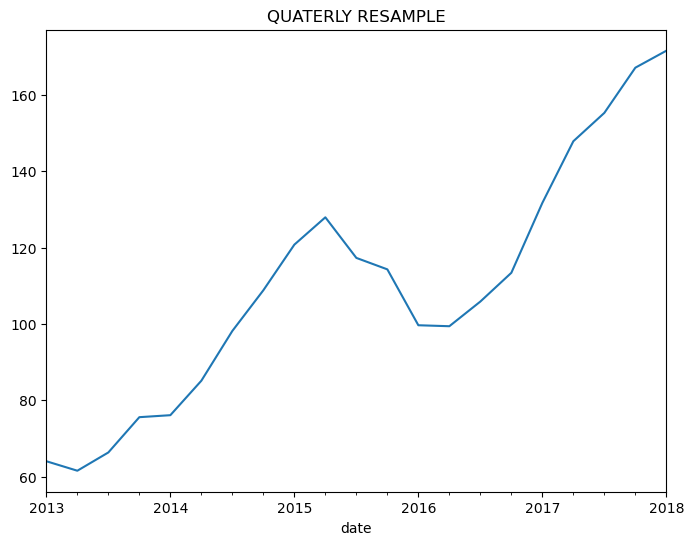

In [187]:
plt.figure(figsize = (8,6))
apple['close'].resample('Q').mean().plot()
plt.title('QUATERLY RESAMPLE')

In [190]:
company_list


['C:\\\\Users\\\\Aryan\\\\OneDrive\\\\Desktop\\\\Udemy Courses\\\\Data Analytics Projects\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\Aryan\\\\OneDrive\\\\Desktop\\\\Udemy Courses\\\\Data Analytics Projects\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\Aryan\\\\OneDrive\\\\Desktop\\\\Udemy Courses\\\\Data Analytics Projects\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\Aryan\\\\OneDrive\\\\Desktop\\\\Udemy Courses\\\\Data Analytics Projects\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [192]:
aapl = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
goog = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [194]:
closing_price = pd.DataFrame()

In [196]:
closing_price['apple_close'] = aapl['close']
closing_price['amazon_close'] = amzn['close']
closing_price['google_close'] = goog['close']
closing_price['microsoft_close'] = msft['close']

In [198]:
closing_price

,apple_close,amazon_close,google_close,microsoft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


# MULTI-VARIATE ANALYSIS FOR CORRELATION

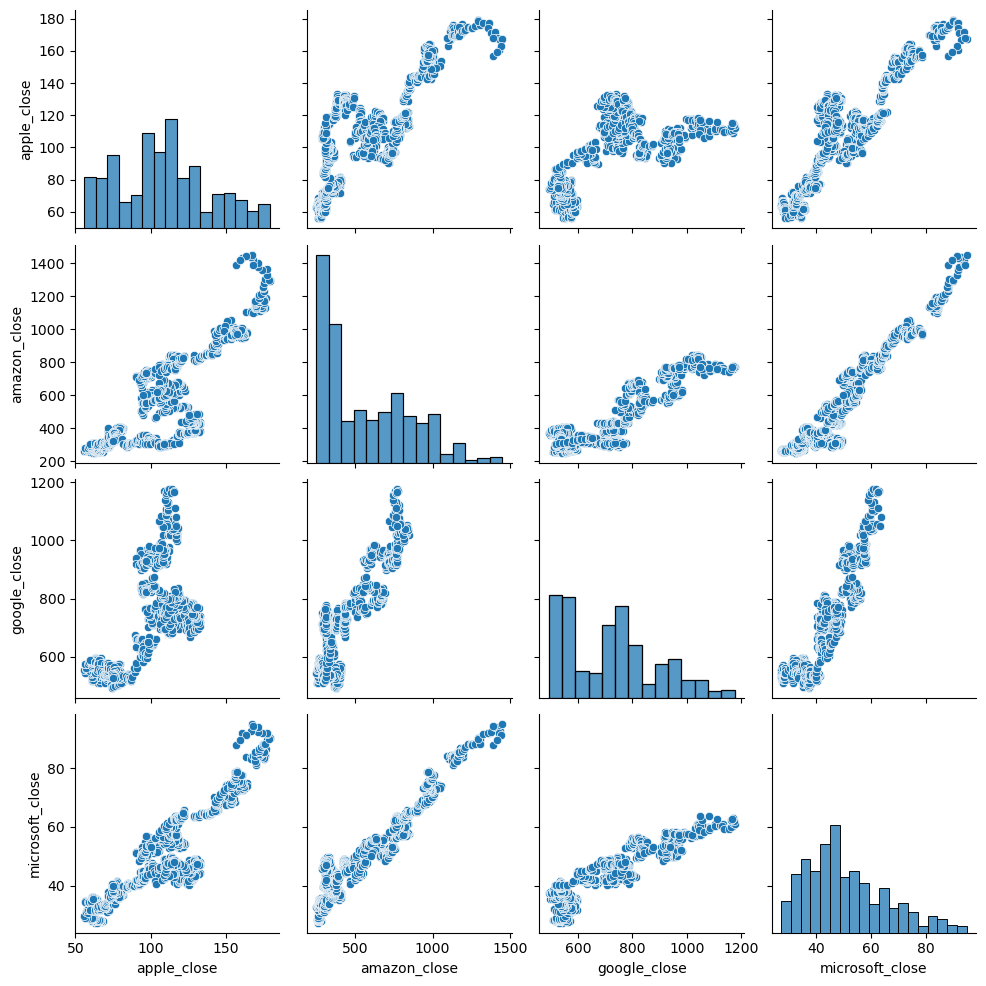

In [215]:
sns.pairplot(closing_price)

In [204]:
closing_price.corr()

,apple_close,amazon_close,google_close,microsoft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amazon_close,0.819078,1.000000,0.888456,0.955977
google_close,0.640522,0.888456,1.000000,0.907011
microsoft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

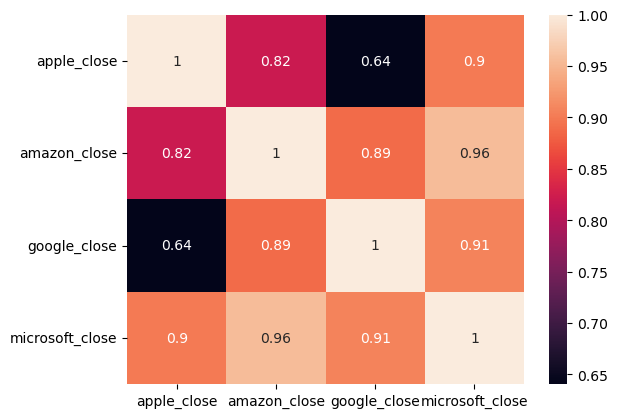

In [210]:
sns.heatmap(closing_price.corr(), annot = True, robust = True, linecolor = 'Black')

# CORRELATION ANALYSIS

In [217]:
closing_price

,apple_close,amazon_close,google_close,microsoft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


In [219]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [221]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [225]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'] * 100

0            NaN
1       1.031484
2      -2.571107
3      -0.190660
4      -0.090015
          ...   
1254    0.208607
1255   -4.535826
1256   -2.562464
1257    4.011532
1258   -2.187539
Name: apple_close, Length: 1259, dtype: float64

In [227]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'microsoft_close'], dtype='object')

In [229]:
for col in closing_price:
   closing_price[col + '_pct_change'] =  (closing_price[col] - closing_price[col].shift(1))/closing_price[col] * 100

In [231]:
closing_price


,apple_close,amazon_close,google_close,microsoft_close,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,microsoft_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.031484,-1.842852,0.273219,1.112706
2,66.8428,258.70,556.97,27.88,-2.571107,0.575957,-0.542220,0.071736
3,66.7156,269.47,567.16,28.03,-0.190660,3.996734,1.796671,0.535141
4,66.6556,269.24,567.00,28.04,-0.090015,-0.085426,-0.028219,0.035663
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.208607,-4.380576,NaN,-0.795672
1255,160.5000,1429.95,NaN,91.78,-4.535826,2.793804,NaN,-2.702114
1256,156.4900,1390.00,NaN,88.00,-2.562464,-2.874101,NaN,-4.295455
1257,163.0300,1442.84,NaN,91.33,4.011532,3.662222,NaN,3.646118


In [233]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'microsoft_close',
       'apple_close_pct_change', 'amazon_close_pct_change',
       'google_close_pct_change', 'microsoft_close_pct_change'],
      dtype='object')

In [237]:
closing_stock_price = closing_price[['apple_close_pct_change', 'amazon_close_pct_change',
       'google_close_pct_change', 'microsoft_close_pct_change']]

In [239]:
closing_stock_price

,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,microsoft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.031484,-1.842852,0.273219,1.112706
2,-2.571107,0.575957,-0.542220,0.071736
3,-0.190660,3.996734,1.796671,0.535141
4,-0.090015,-0.085426,-0.028219,0.035663
...,...,...,...,...
1254,0.208607,-4.380576,NaN,-0.795672
1255,-4.535826,2.793804,NaN,-2.702114
1256,-2.562464,-2.874101,NaN,-4.295455
1257,4.011532,3.662222,NaN,3.646118


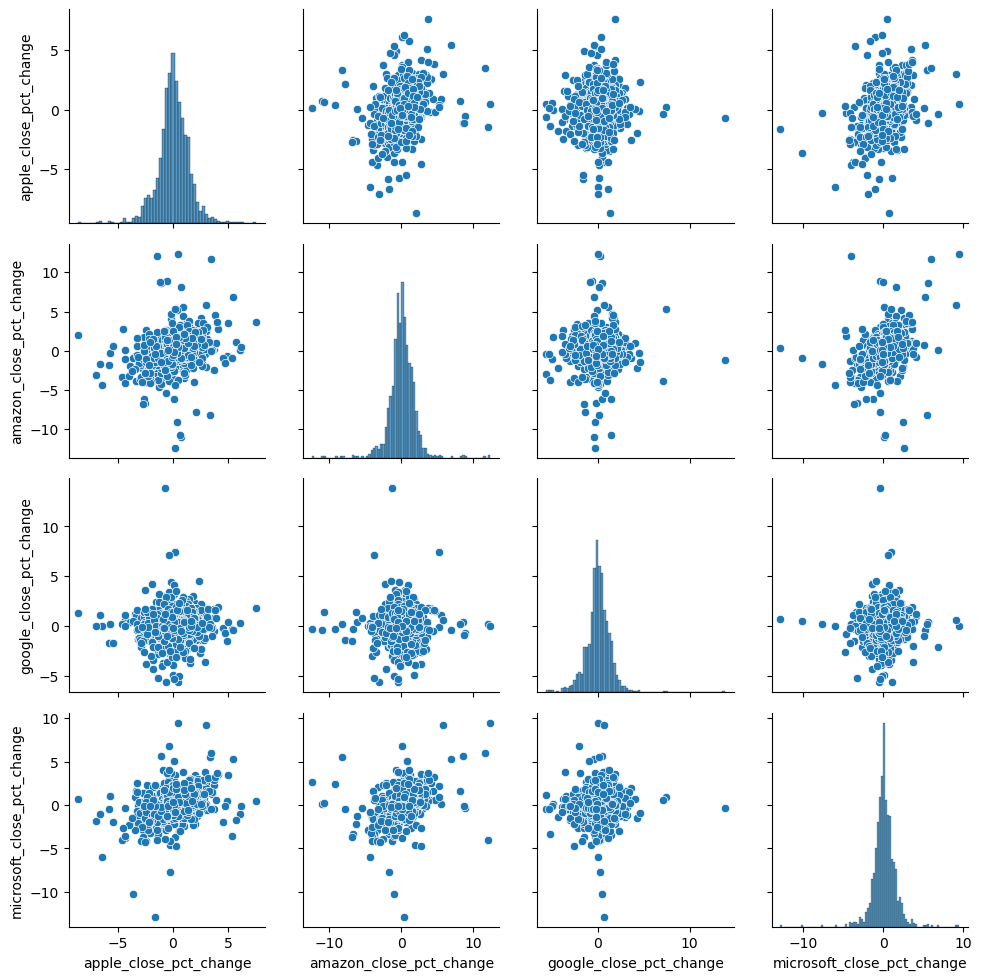

In [247]:
g = sns.PairGrid(closing_stock_price)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.scatterplot)

In [249]:
closing_stock_price.corr()

,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,microsoft_close_pct_change
apple_close_pct_change,1.000000,0.289184,0.037044,0.368796
amazon_close_pct_change,0.289184,1.000000,0.030146,0.388924
google_close_pct_change,0.037044,0.030146,1.000000,0.040174
microsoft_close_pct_change,0.368796,0.388924,0.040174,1.000000


<Axes: >

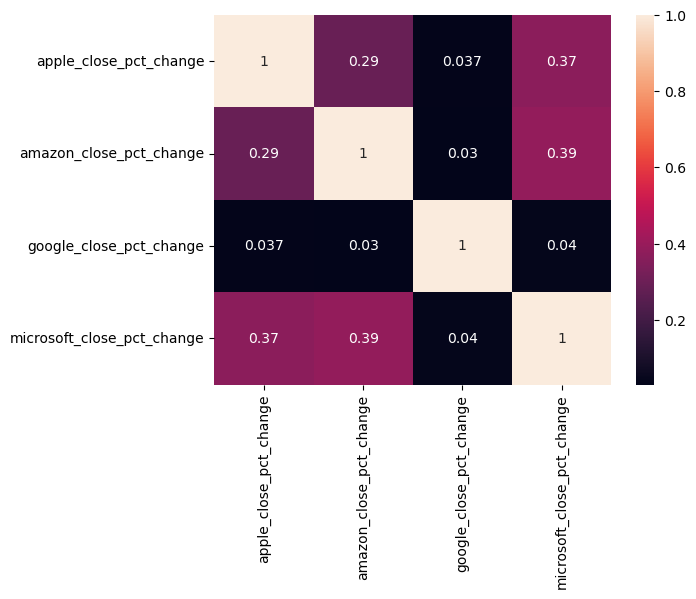

In [251]:
sns.heatmap(closing_stock_price.corr(), annot = True, robust = True)